In [2]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

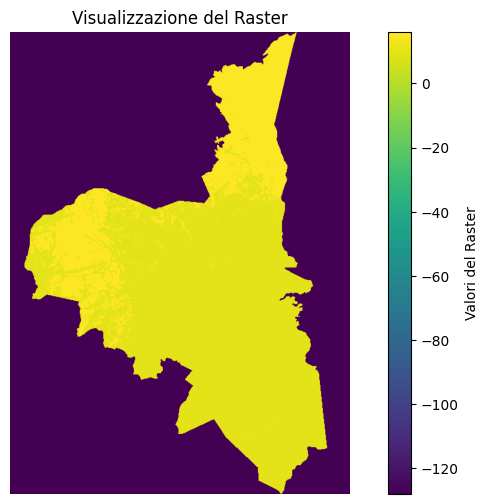

Statistiche del Raster:
Minimo: 7
Massimo: 16
Media: 11.428833852519439
Deviazione Standard: 2.6347194435676906


NameError: name 'min_val' is not defined

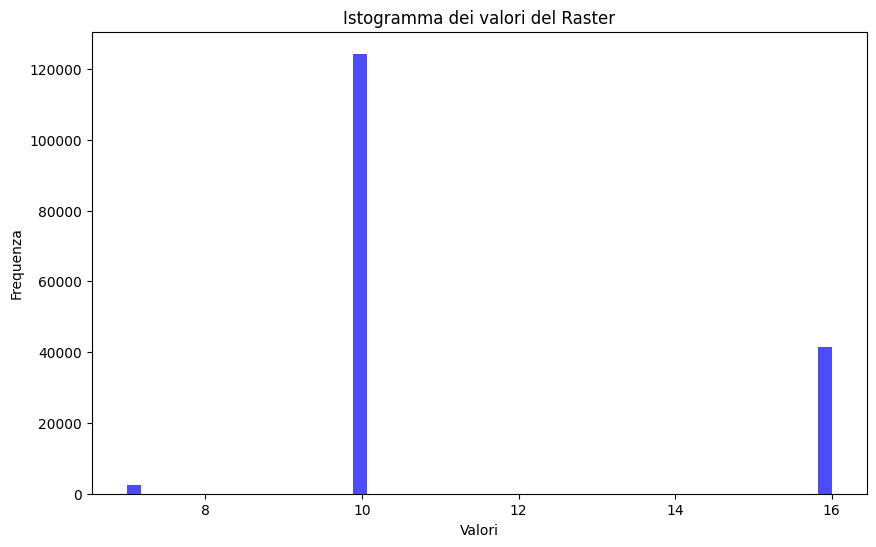

In [3]:
tif_path = "Modis_Land_Cover_Data/"
tif_path = tif_path + f"2010LCT.tif"
# Apertura del file TIF
with rasterio.open(tif_path) as src:
    data = src.read(1)  # Legge la prima banda (assumendo raster a banda singola)
    profile = src.profile  # Metadati del file
    nodata = src.nodata

# Visualizzazione dell'immagine raster
plt.figure(figsize=(10, 6))
plt.imshow(data, cmap='viridis')
plt.title("Visualizzazione del Raster")
plt.colorbar(label="Valori del Raster")
plt.axis('off')
plt.show()

# Calcolo di statistiche (escludendo i valori nodata se presenti)
data_masked = np.ma.masked_array(data, mask=(data == nodata))
print("Statistiche del Raster:")
print("Minimo:", data_masked.min())
print("Massimo:", data_masked.max())
print("Media:", data_masked.mean())
print("Deviazione Standard:", data_masked.std())

# Istogramma dei valori
plt.figure(figsize=(10, 6))
plt.hist(data_masked.compressed(), bins=50, color='blue', alpha=0.7)
plt.title("Istogramma dei valori del Raster")
plt.xlabel("Valori")
plt.ylabel("Frequenza")
plt.text(0.05, 0.95, f"Min: {min_val:.2f}\nMax: {max_val:.2f}",
            transform=ax.transAxes, fontsize=9, color='white',
            verticalalignment='top', bbox=dict(facecolor='black', alpha=0.5))
plt.show()

Anno 2010 - File: Modis_Land_Cover_Data/2010LCT.tif
  Shape: (769, 565), Min: 7, Max: 16
  TFW: [463.3127165275, 0.0, 0.0, -463.3127165275, -1378586.9880285764, 2036027.7327810985]
Anno 2011 - File: Modis_Land_Cover_Data/2011LCT.tif
  Shape: (769, 565), Min: 7, Max: 16
  TFW: [463.3127165275, 0.0, 0.0, -463.3127165275, -1378586.9880285764, 2036027.7327810985]
Anno 2012 - File: Modis_Land_Cover_Data/2012LCT.tif
  Shape: (769, 565), Min: 7, Max: 16
  TFW: [463.3127165275, 0.0, 0.0, -463.3127165275, -1378586.9880285764, 2036027.7327810985]
Anno 2013 - File: Modis_Land_Cover_Data/2013LCT.tif
  Shape: (769, 565), Min: 7, Max: 16
  TFW: [463.3127165275, 0.0, 0.0, -463.3127165275, -1378586.9880285764, 2036027.7327810985]
Anno 2014 - File: Modis_Land_Cover_Data/2014LCT.tif
  Shape: (769, 565), Min: 7, Max: 16
  TFW: [463.3127165275, 0.0, 0.0, -463.3127165275, -1378586.9880285764, 2036027.7327810985]
Anno 2015 - File: Modis_Land_Cover_Data/2015LCT.tif
  Shape: (769, 565), Min: 7, Max: 16
  TFW:

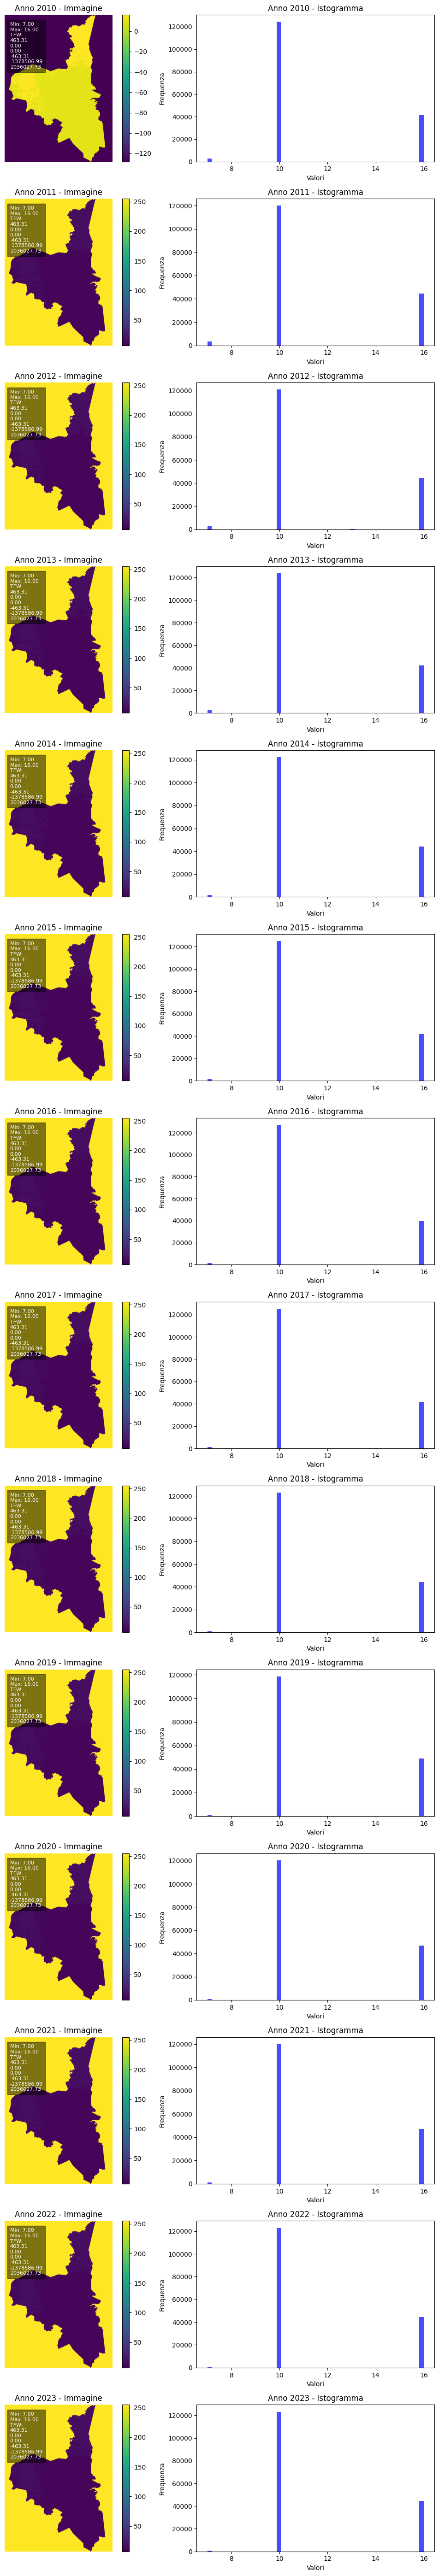

In [13]:
import os
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import math

def read_tfw(file_path):
    """
    Legge il file world (.tfw) associato al file TIFF.
    Restituisce una lista di 6 valori float, oppure None se il file non esiste.
    """
    tfw_path = file_path.replace('.tif', '.tfw')
    if os.path.exists(tfw_path):
        with open(tfw_path, 'r') as f:
            lines = f.readlines()
            try:
                values = [float(line.strip()) for line in lines]
                return values
            except Exception as e:
                print(f"Errore nella lettura del file TFW {tfw_path}: {e}")
                return None
    else:
        return None

# Definisci l'intervallo di anni (2010 fino a 2023 inclusi)
anni = range(2010, 2024)
dati_raster = {}

# Per ogni anno, carica il file TIFF, calcola statistiche e leggi il file TFW
for anno in anni:
    file_path = f"Modis_Land_Cover_Data/{anno}LCT.tif"

    if not os.path.exists(file_path):
        print(f"File non trovato per l'anno {anno}: {file_path}")
        continue

    try:
        with rasterio.open(file_path) as src:
            data = src.read(1).copy()  # Copia esplicita per evitare riferimenti condivisi
            nodata = src.nodata
            if nodata is not None:
                data_masked = np.ma.masked_equal(data, nodata)
            else:
                data_masked = data
            min_val = data_masked.min()
            max_val = data_masked.max()
            tfw_values = read_tfw(file_path)

            # Salva le informazioni in un dizionario
            dati_raster[anno] = {
                "data": data,
                "min": min_val,
                "max": max_val,
                "tfw": tfw_values,
                "nodata": nodata
            }

            # Stampa informazioni di debug
            print(f"Anno {anno} - File: {file_path}")
            print(f"  Shape: {data.shape}, Min: {min_val}, Max: {max_val}")
            if tfw_values is not None:
                print(f"  TFW: {tfw_values}")
            else:
                print("  TFW non trovato")
    except Exception as e:
        print(f"Errore nel leggere il file per l'anno {anno}: {e}")

if not dati_raster:
    print("Nessun file caricato. Verifica il percorso e i nomi dei file.")
    exit()

# Creazione della figura: ogni anno avrà 2 subplot (immagine e istogramma) in una riga
n_years = len(dati_raster)
fig, axes = plt.subplots(n_years, 2, figsize=(12, 4 * n_years))

# Se c'è un solo anno, forziamo axes ad avere due dimensioni
if n_years == 1:
    axes = np.array([axes])

# Ordina i dati per anno e crea i grafici
for idx, (anno, info) in enumerate(sorted(dati_raster.items())):
    data = info["data"]
    min_val = info["min"]
    max_val = info["max"]
    tfw = info["tfw"]
    nodata = info["nodata"]

    # Primo subplot: immagine raster con annotazioni
    ax_img = axes[idx, 0]
    im = ax_img.imshow(data, cmap='viridis')
    ax_img.set_title(f"Anno {anno} - Immagine")
    ax_img.axis('off')
    annotation_text = f"Min: {min_val:.2f}\nMax: {max_val:.2f}"
    if tfw is not None:
        # I 6 valori del TFW: [pixel size X, rotazione, rotazione, pixel size Y, X origine, Y origine]
        annotation_text += "\nTFW:\n" + "\n".join([f"{v:.2f}" for v in tfw])
    ax_img.text(0.05, 0.95, annotation_text,
                transform=ax_img.transAxes, fontsize=8, color='white',
                verticalalignment='top', bbox=dict(facecolor='black', alpha=0.5))
    fig.colorbar(im, ax=ax_img, fraction=0.046, pad=0.04)

    # Secondo subplot: istogramma dei valori
    ax_hist = axes[idx, 1]
    # Se è definito un valore nodata, escludilo dall'istogramma
    if nodata is not None:
        data_masked = np.ma.masked_equal(data, nodata)
        valori = data_masked.compressed()  # Array 1D senza i valori nodata
    else:
        valori = data.flatten()
    ax_hist.hist(valori, bins=50, color='blue', alpha=0.7)
    ax_hist.set_title(f"Anno {anno} - Istogramma")
    ax_hist.set_xlabel("Valori")
    ax_hist.set_ylabel("Frequenza")

plt.tight_layout()
plt.show()


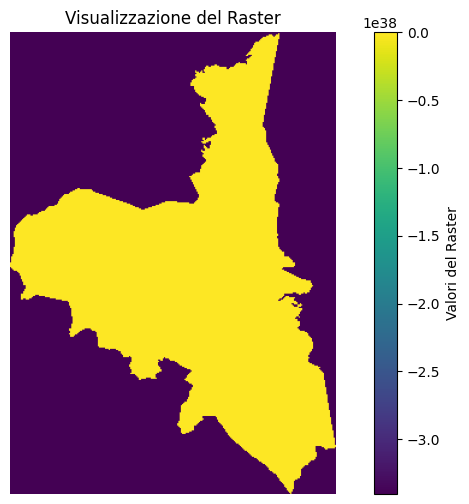

In [8]:
tif_path = "Gridded_Population_Density_Data/Assaba_Pop_2020.tif"
# Apertura del file TIF
with rasterio.open(tif_path) as src:
    data = src.read(1)  # Legge la prima banda (assumendo raster a banda singola)
    profile = src.profile  # Metadati del file
    nodata = src.nodata

# Visualizzazione dell'immagine raster
plt.figure(figsize=(10, 6))
plt.imshow(data, cmap='viridis')
plt.title("Visualizzazione del Raster")
plt.colorbar(label="Valori del Raster")
plt.axis('off')
plt.show()

Anno 2010 - File: Modis_Land_Cover_Data/2010LCT.tif
  Shape: (769, 565), Min: 7, Max: 16
  TFW: [463.3127165275, 0.0, 0.0, -463.3127165275, -1378586.9880285764, 2036027.7327810985]
Anno 2011 - File: Modis_Land_Cover_Data/2011LCT.tif
  Shape: (769, 565), Min: 7, Max: 16
  TFW: [463.3127165275, 0.0, 0.0, -463.3127165275, -1378586.9880285764, 2036027.7327810985]
Anno 2012 - File: Modis_Land_Cover_Data/2012LCT.tif
  Shape: (769, 565), Min: 7, Max: 16
  TFW: [463.3127165275, 0.0, 0.0, -463.3127165275, -1378586.9880285764, 2036027.7327810985]
Anno 2013 - File: Modis_Land_Cover_Data/2013LCT.tif
  Shape: (769, 565), Min: 7, Max: 16
  TFW: [463.3127165275, 0.0, 0.0, -463.3127165275, -1378586.9880285764, 2036027.7327810985]
Anno 2014 - File: Modis_Land_Cover_Data/2014LCT.tif
  Shape: (769, 565), Min: 7, Max: 16
  TFW: [463.3127165275, 0.0, 0.0, -463.3127165275, -1378586.9880285764, 2036027.7327810985]
Anno 2015 - File: Modis_Land_Cover_Data/2015LCT.tif
  Shape: (769, 565), Min: 7, Max: 16
  TFW:

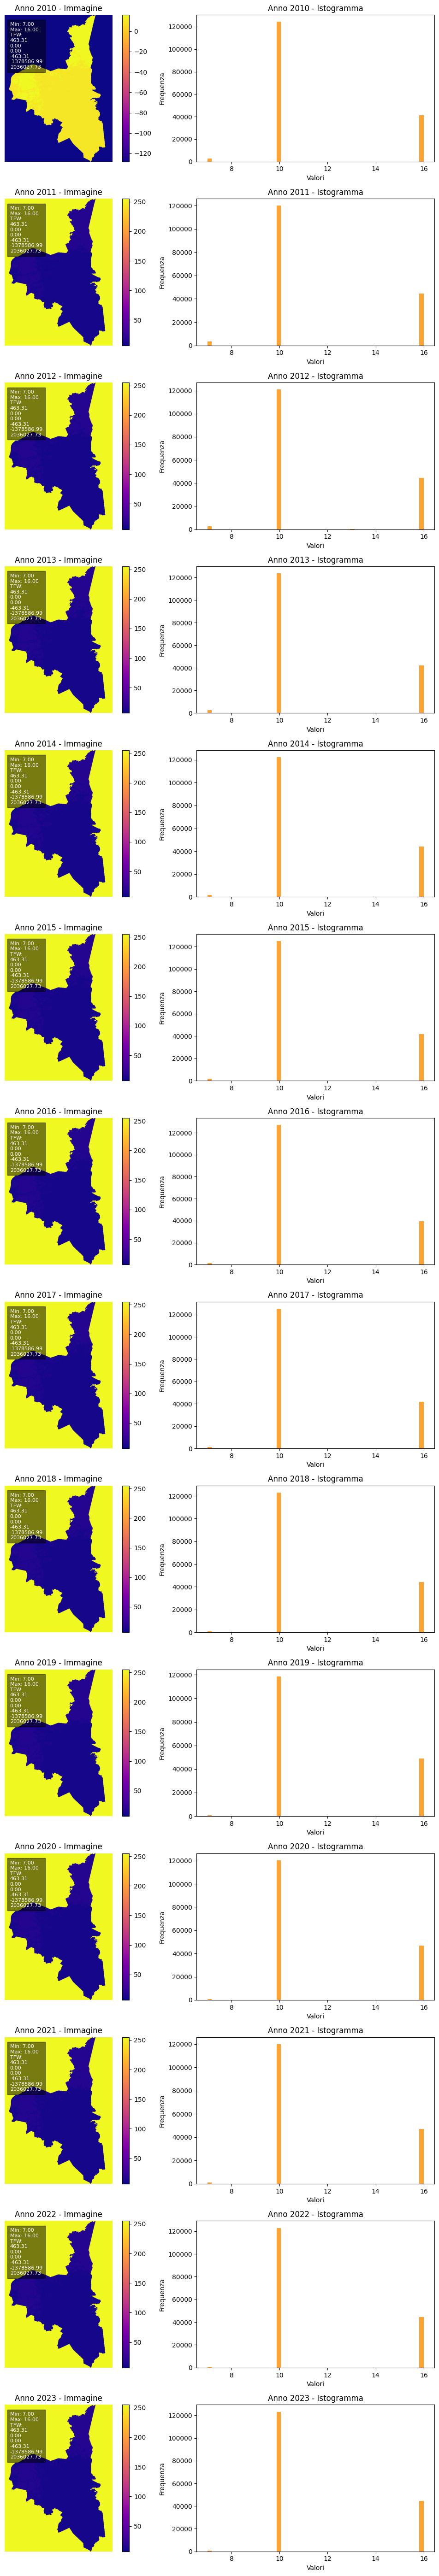

In [11]:
import os
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import math

def read_tfw(file_path):
    """
    Legge il file world (.tfw) associato al file TIFF.
    Restituisce una lista di 6 valori float, oppure None se il file non esiste.
    """
    tfw_path = file_path.replace('.tif', '.tfw')
    if os.path.exists(tfw_path):
        with open(tfw_path, 'r') as f:
            lines = f.readlines()
            try:
                values = [float(line.strip()) for line in lines]
                return values
            except Exception as e:
                print(f"Errore nella lettura del file TFW {tfw_path}: {e}")
                return None
    else:
        return None

# Definisci l'intervallo di anni (2010 fino a 2023 inclusi)
anni = range(2010, 2024)
dati_raster = {}

# Per ogni anno, carica il file TIFF, calcola statistiche e leggi il file TFW
for anno in anni:
    file_path = f"Modis_Land_Cover_Data/{anno}LCT.tif"

    if not os.path.exists(file_path):
        print(f"File non trovato per l'anno {anno}: {file_path}")
        continue

    try:
        with rasterio.open(file_path) as src:
            data = src.read(1).copy()  # Copia esplicita per evitare riferimenti condivisi
            nodata = src.nodata
            if nodata is not None:
                data_masked = np.ma.masked_equal(data, nodata)
            else:
                data_masked = data
            min_val = data_masked.min()
            max_val = data_masked.max()
            tfw_values = read_tfw(file_path)

            # Salva le informazioni in un dizionario
            dati_raster[anno] = {
                "data": data,
                "min": min_val,
                "max": max_val,
                "tfw": tfw_values,
                "nodata": nodata
            }

            # Stampa informazioni di debug
            print(f"Anno {anno} - File: {file_path}")
            print(f"  Shape: {data.shape}, Min: {min_val}, Max: {max_val}")
            if tfw_values is not None:
                print(f"  TFW: {tfw_values}")
            else:
                print("  TFW non trovato")
    except Exception as e:
        print(f"Errore nel leggere il file per l'anno {anno}: {e}")

if not dati_raster:
    print("Nessun file caricato. Verifica il percorso e i nomi dei file.")
    exit()

# Creazione della figura: ogni anno avrà 2 subplot (immagine e istogramma) in una riga
n_years = len(dati_raster)
fig, axes = plt.subplots(n_years, 2, figsize=(12, 4 * n_years))

# Se c'è un solo anno, forziamo axes ad avere due dimensioni
if n_years == 1:
    axes = np.array([axes])

# Ordina i dati per anno e crea i grafici
for idx, (anno, info) in enumerate(sorted(dati_raster.items())):
    data = info["data"]
    min_val = info["min"]
    max_val = info["max"]
    tfw = info["tfw"]
    nodata = info["nodata"]

    # Primo subplot: immagine raster con annotazioni
    ax_img = axes[idx, 0]
    im = ax_img.imshow(data, cmap='plasma')  # Uso il colormap "plasma"
    ax_img.set_title(f"Anno {anno} - Immagine")
    ax_img.axis('off')
    annotation_text = f"Min: {min_val:.2f}\nMax: {max_val:.2f}"
    if tfw is not None:
        # I 6 valori del TFW: [pixel size X, rotazione, rotazione, pixel size Y, X origine, Y origine]
        annotation_text += "\nTFW:\n" + "\n".join([f"{v:.2f}" for v in tfw])
    ax_img.text(0.05, 0.95, annotation_text,
                transform=ax_img.transAxes, fontsize=8, color='white',
                verticalalignment='top', bbox=dict(facecolor='black', alpha=0.5))
    fig.colorbar(im, ax=ax_img, fraction=0.046, pad=0.04)

    # Secondo subplot: istogramma dei valori
    ax_hist = axes[idx, 1]
    # Se è definito un valore nodata, escludilo dall'istogramma
    if nodata is not None:
        data_masked = np.ma.masked_equal(data, nodata)
        valori = data_masked.compressed()  # Array 1D senza i valori nodata
    else:
        valori = data.flatten()
    ax_hist.hist(valori, bins=50, color='darkorange', alpha=0.8)  # Istogramma con colore darkorange
    ax_hist.set_title(f"Anno {anno} - Istogramma")
    ax_hist.set_xlabel("Valori")
    ax_hist.set_ylabel("Frequenza")

plt.tight_layout()
plt.show()

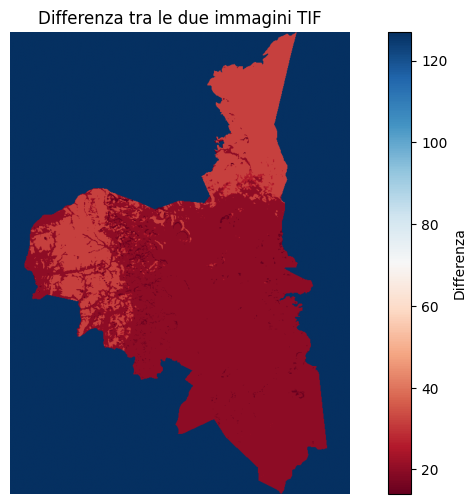

In [43]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Specifica i percorsi dei file TIF
tif1 = "Modis_Land_Cover_Data/2010LCT.tif"
tif2 = "Modis_Land_Cover_Data/2011LCT.tif"

# Apertura e lettura dei dati (assumendo raster a banda singola)
with rasterio.open(tif1) as src1:
    data1 = src1.read(1).astype(np.float32)  # Converte in float per operazioni di differenza
with rasterio.open(tif2) as src2:
    data2 = src2.read(1).astype(np.float32)

# Calcola la differenza tra le due immagini
diff = data2 + data1

# Visualizza la differenza
plt.figure(figsize=(10, 6))
plt.imshow(diff, cmap='RdBu')
plt.colorbar(label="Differenza")
plt.title("Differenza tra le due immagini TIF")
plt.axis('off')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il file CSV con parse_dates e low_memory=False per evitare warning sui tipi
df = pd.read_csv("bfa-rainfall-adm2-full.csv", parse_dates=["date"], low_memory=False)
# Utilizzando .iloc per selezionare tutte le righe a partire dalla seconda
df = df.iloc[1:]

# Filtra i dati per il periodo dal 1° gennaio 2000 al 31 dicembre 2023
mask = (df["date"] >= "2021-06-01") & (df["date"] <= "2022-06-01")
df_filtered = df.loc[mask]
df_filtered["rfh"] = pd.to_numeric(df_filtered["rfh"], errors="coerce")

# Converte 'rfh' in numerico se non lo è già
df_filtered["rfh"] = pd.to_numeric(df_filtered["rfh"], errors="coerce")

# Somma totale della pioggia per ogni giorno
df_daily_sum = df_filtered.groupby("date")["rfh"].sum().reset_index()

# Ordina i dati per data
df_daily_sum = df_daily_sum.sort_values(by="date").reset_index(drop=True)

print(df_daily_sum[["date", "rfh"]].head(100))

          date        rfh
0   2021-06-01  1499.6311
1   2021-06-11  1439.9793
2   2021-06-21  2169.2338
3   2021-07-01  2266.8475
4   2021-07-11  1675.2075
5   2021-07-21  3570.2369
6   2021-08-01  4308.4499
7   2021-08-11  4333.1710
8   2021-08-21  4110.4739
9   2021-09-01  2082.0498
10  2021-09-11  1583.6125
11  2021-09-21  1866.0707
12  2021-10-01   717.0667
13  2021-10-11   822.2536
14  2021-10-21   451.7899
15  2021-11-01    90.5481
16  2021-11-11    71.2852
17  2021-11-21    17.4176
18  2021-12-01    16.5281
19  2021-12-11    10.7480
20  2021-12-21     8.8602
21  2022-01-01     1.7318
22  2022-01-11     0.9809
23  2022-01-21     3.3455
24  2022-02-01     5.3890
25  2022-02-11    10.0307
26  2022-02-21    21.3166
27  2022-03-01    99.3878
28  2022-03-11   143.0738
29  2022-03-21   229.7455
30  2022-04-01   494.3420
31  2022-04-11   567.0400
32  2022-04-21   419.5350
33  2022-05-01   742.2510
34  2022-05-11   565.5409
35  2022-05-21  1292.5114
36  2022-06-01  1533.9519


/var/folders/sd/zksxfqz16f55vlnbvr49j0_00000gn/T/ipykernel_84903/2108564858.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("bfa-rainfall-adm2-full.csv", parse_dates=["date"], low_memory=False)
/var/folders/sd/zksxfqz16f55vlnbvr49j0_00000gn/T/ipykernel_84903/2108564858.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["rfh"] = pd.to_numeric(df_filtered["rfh"], errors="coerce")
/var/folders/sd/zksxfqz16f55vlnbvr49j0_00000gn/T/ipykernel_84903/2108564858.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

/var/folders/sd/zksxfqz16f55vlnbvr49j0_00000gn/T/ipykernel_84903/1632106611.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("bfa-rainfall-adm2-full.csv", parse_dates=["date"], low_memory=False)
/var/folders/sd/zksxfqz16f55vlnbvr49j0_00000gn/T/ipykernel_84903/1632106611.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["rfh"] = pd.to_numeric(df_filtered["rfh"], errors="coerce")
/var/folders/sd/zksxfqz16f55vlnbvr49j0_00000gn/T/ipykernel_84903/1632106611.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

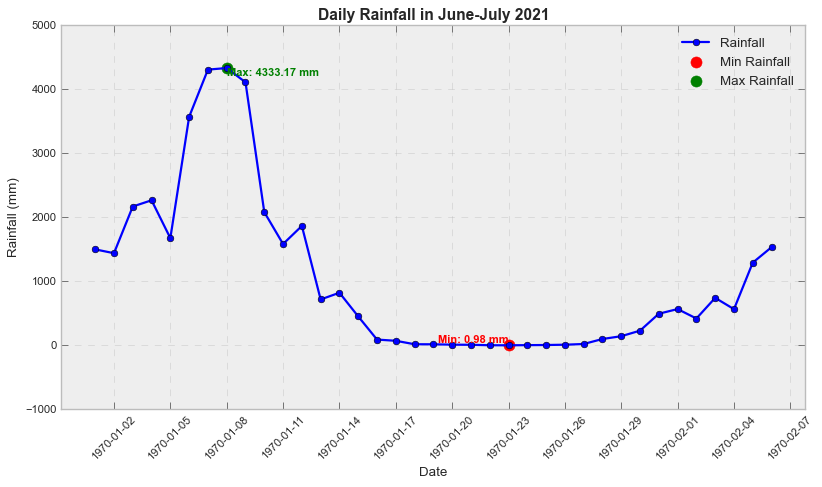

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il file CSV con parse_dates e low_memory=False per evitare warning sui tipi
df = pd.read_csv("bfa-rainfall-adm2-full.csv", parse_dates=["date"], low_memory=False)
# Utilizzando .iloc per selezionare tutte le righe a partire dalla seconda
df = df.iloc[1:]

# Filtra i dati per il periodo dal 1° gennaio 2000 al 31 dicembre 2023
mask = (df["date"] >= "2021-06-01") & (df["date"] <= "2022-06-01")
df_filtered = df.loc[mask]
df_filtered["rfh"] = pd.to_numeric(df_filtered["rfh"], errors="coerce")

# Converte 'rfh' in numerico se non lo è già
df_filtered["rfh"] = pd.to_numeric(df_filtered["rfh"], errors="coerce")

# Somma totale della pioggia per ogni giorno
df_daily_sum = df_filtered.groupby("date")["rfh"].sum().reset_index()

# Ordina i dati per data
df_daily_sum = df_daily_sum.sort_values(by="date").reset_index(drop=True)

#print(df_daily_sum[["date", "rfh"]].head(100))

# ------- grafico

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Trova i valori minimo e massimo
min_value = df_daily_sum["rfh"].min()
max_value = df_daily_sum["rfh"].max()
min_date = df_daily_sum.loc[df_daily_sum["rfh"].idxmin(), "date"]
max_date = df_daily_sum.loc[df_daily_sum["rfh"].idxmax(), "date"]

# Stile del grafico
plt.style.use("bmh")  # Stile più moderno

# Creazione della figura
fig, ax = plt.subplots(figsize=(12, 6))

# Plot con linee più spesse e punti evidenziati
ax.plot(df_daily_sum["date"], df_daily_sum["rfh"], marker='o', linestyle='-', color='b', linewidth=2, markersize=6, label='Rainfall')

# Evidenzia Min e Max con colori distintivi
ax.scatter(min_date, min_value, color='red', s=100, label="Min Rainfall")
ax.scatter(max_date, max_value, color='green', s=100, label="Max Rainfall")

# Aggiungi etichette direttamente sui punti
ax.text(min_date, min_value, f"Min: {min_value:.2f} mm", fontsize=10, verticalalignment='bottom', horizontalalignment='right', color='red', fontweight='bold')
ax.text(max_date, max_value, f"Max: {max_value:.2f} mm", fontsize=10, verticalalignment='top', horizontalalignment='left', color='green', fontweight='bold')

# Miglioramento asse X
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))  # Mostra date leggibili
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))  # Mostra una data ogni 3 giorni
plt.xticks(rotation=45)  # Ruota le etichette delle date

# Aggiungi griglia leggera
ax.grid(True, linestyle="--", alpha=0.6)

# Imposta titolo e etichette con font migliori
ax.set_title("Daily Rainfall in June-July 2021", fontsize=14, fontweight="bold")
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Rainfall (mm)", fontsize=12)

# Aggiungi legenda
ax.legend()

# Mostra il grafico
plt.show()